Preliminary analysis of the project data. One first imports all necessary packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data is loaded from the path and graph folder.

In [3]:
# Folder
PATH_FOLDER = 'wikispeedia_paths-and-graph/'

# Defining paths
ARTICLES_DATA = PATH_FOLDER + "articles.tsv"
CATEGORIES_DATA = PATH_FOLDER + "categories.tsv"
LINKS_DATA = PATH_FOLDER + "links.tsv"
PATH_FINISHED_DATA = PATH_FOLDER + "paths_finished.tsv"
PATH_UNFINISHED_DATA = PATH_FOLDER + "paths_unfinished.tsv"
SHORTESTPATH_DATA = PATH_FOLDER + "shortest-path-distance-matrix.txt"

# Loading all data series
articles = pd.read_csv(ARTICLES_DATA, header=None, names=['article'], comment='#')
categories = pd.read_csv(CATEGORIES_DATA, sep='\t', header=None, names=['article', 'category'], comment='#')
links = pd.read_csv(LINKS_DATA, sep='\t', header=None, names=["linkSource", 'linkTarget'], comment='#')
path_finished = pd.read_csv(PATH_FINISHED_DATA, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'], comment='#')
path_unfinished = pd.read_csv(PATH_UNFINISHED_DATA, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'], comment='#')
shortest_path = pd.read_csv(SHORTESTPATH_DATA, sep='\t', header=None, names=['shortestPath'], comment='#')
categories.head()

,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists


In [4]:
# Conversion of Unix to Christian time for the path files
path_finished['timestamp'] = pd.to_datetime(path_finished['timestamp'], unit='s', origin='unix')
path_unfinished['timestamp'] = pd.to_datetime(path_finished['timestamp'], unit='s', origin='unix')
path_finished.head()

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


One first checks if some Na values appear among categories.

In [5]:
categories.isna().sum()

article     0
category    0
dtype: int64

One then groups all articles by category.

In [30]:
categories_grouped = categories.groupby(by="category")
nb_categories = categories_grouped.ngroups
print("There are {} categories in the dataset.".format(nb_categories))

There are 129 categories in the dataset.


The histogram provides the distribution of articles per category.

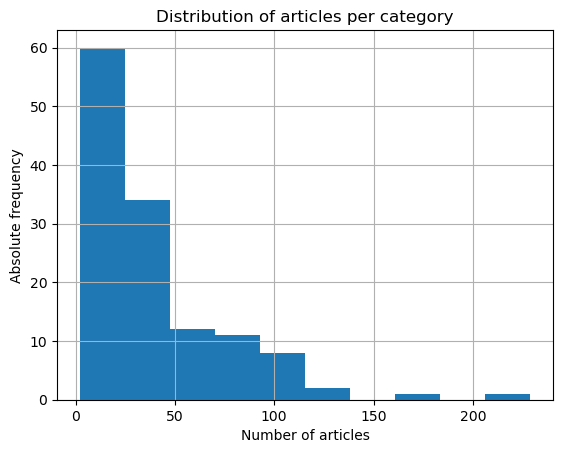

In [9]:
nb_articles_per_category = categories_grouped.size()
nb_articles_per_category.hist()
plt.xlabel('Number of articles')
plt.ylabel('Absolute frequency')
plt.title('Distribution of articles per category');

One then considers specific categories: countries, geographic regions and people. To get the number of articles belonging to each category, one checks if a given keyword belongs to the category string.

In [41]:
countries = categories_grouped.filter(lambda x: 'Countries' in str(x['category']))
print("There are {} countries in the dataset.".format(countries.size))

There are 458 countries in the dataset.


In [42]:
regions = categories_grouped.filter(lambda x: 'Geography' in str(x['category']))
print("There are {} regions or cities in the dataset.".format(regions.shape[0]))

There are 1084 regions or cities in the dataset.


In [44]:
people = categories_grouped.filter(lambda x: 'People' in str(x['category']))
print("There are {} people in the dataset.".format(people.shape[0]))

There are 711 people in the dataset.
